# Numerical integration

This notebook explores numerical integration methods, including Riemann sums, Newton-Cotes formulas (midpoint, trapezoidal, Simpson's rule), and Gaussian quadrature. It demonstrates how to approximate definite integrals for various functions, both analytically and using real data. Codes are partially made by AI, so caution is required. 

## Riemann sums



The Riemann sum example demonstrates how to approximate the area under the curve $f(x) = x^2$ on the interval $[0, 2]$ by dividing the interval into $n = 15$ subintervals. The code calculates both the lower sum (using left endpoints) and the upper sum (using right endpoints), then visualizes these approximations as shaded bars under the curve. The lower and upper sums provide bounds for the true value of the integral, illustrating how increasing the number of subintervals improves the approximation. This approach forms the foundation for more advanced numerical integration methods.

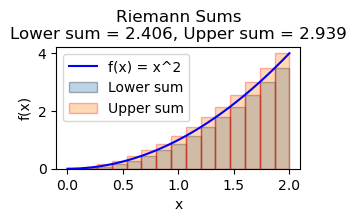

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return x**2

# Interval [a, b] and number of subintervals
a, b = 0, 2
n = 15
x = np.linspace(a, b, n+1)
dx = (b - a) / n

# Lower sum (left endpoints)
x_left = x[:-1]
lower_sum = np.sum(f(x_left) * dx)

# Upper sum (right endpoints)
x_right = x[1:]
upper_sum = np.sum(f(x_right) * dx)

# Plotting
X = np.linspace(a, b, 100)
plt.plot(X, f(X), 'b', label='f(x) = x^2')
plt.bar(x_left, f(x_left), width=dx, alpha=0.3, align='edge', edgecolor='k', label='Lower sum')
plt.bar(x_right-dx, f(x_right), width=dx, alpha=0.3, align='edge', edgecolor='r', label='Upper sum')
plt.legend()
plt.title(f'Riemann Sums\nLower sum = {lower_sum:.3f}, Upper sum = {upper_sum:.3f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.gcf().set_size_inches(8 / 2.54, 4 / 2.54)
plt.show()

**Tasks** 

Calculate the real value of the integral $\int_0^2 x^2 dx$, and compare with the Riemann sums. Play with the number of intervals, $n$, what do you notice. If you take the mean value of the Upper and Lower sum, will that improve the result?

## Quadratures on a single interval
Quadrature is a general term for numerical methods that approximate the definite integral of a function over an interval $[a, b]$. For a single interval (not subdivided into smaller subintervals, i.e., not composite), quadrature formulas estimate the area under the curve by evaluating the function at specific points and combining these values with appropriate weights.

The general form of a quadrature rule on $[a, b]$ is:
$$
\int_a^b f(x)\,dx \approx \sum_{i=1}^n w_i\, f(x_i)
$$
where $x_i$ are the nodes (points in $[a, b]$) and $w_i$ are the corresponding weights.

Common non-composite quadrature rules include:
- **Midpoint rule:** Uses the function value at the midpoint of $[a, b]$. Representing the function with a polynomial of order 0. 
- **Trapezoidal rule:** Uses the function values at the endpoints. Representing the function with a polynomial of order 1. 
- **Simpson's rule:** Uses the function values at the endpoints and the midpoint. Representing the function with a polynomial of order 2. 

These rules provide increasingly accurate approximations for smooth functions, especially when the interval is small. For higher accuracy over larger intervals, composite versions (applying the rule to many subintervals) are often used, see later.


In [2]:
# Defining functions that uses numerical integration for a function f over the interval [a, b].
def midpoint_rule(f, a, b):
    """Approximate the integral of f over [a, b] using the midpoint rule."""
    mid = (a + b) / 2
    return (b - a) * f(mid)

def trapezoidal_rule(f, a, b):
    """Approximate the integral of f over [a, b] using the trapezoidal rule."""
    return (b - a) * (f(a) + f(b)) / 2

def simpsons_rule(f, a, b):
    """Approximate the integral of f over [a, b] using Simpson's rule."""
    mid = (a + b) / 2
    return (b - a) * (f(a) + 4 * f(mid) + f(b)) / 6

Here are some functions pre-coded for you. 

In [3]:
# Example functions for integration and plotting

def f_linear(x):
    """Linear function: f(x) = 2x + 1"""
    return 2 * x + 1

def f_quadratic(x):
    """Quadratic function: f(x) = x^2"""
    return x ** 2

def f_cubic(x):
    """Cubic function: f(x) = x^3 - x + 2"""
    return x ** 3 - x + 2

def f_sin(x):
    """Sine function: f(x) = sin(pi * x)"""
    return np.sin(np.pi * x)

def f_exp(x):
    """Exponential function: f(x) = exp(x)"""
    return np.exp(x)



**Tasks**

For each the functions above check the result from the midpoint, the trapezoid and the Simpson integration methods when integrating from $x=a=0$ to $x=b=1$. For each of them, calculate the analytical result and compare with the numerical methods. 

In [4]:
# Use the functions above to check the different numerical integrating methods.

analytical_result = None # change this for each of the functions for comparison
f=f_linear # Change this to test different functions
a=0 # Lower limit of integration
b=1 # Upper limit of integration
midpoint_result = midpoint_rule(f, a, b) # Midpoint rule result
trapezoidal_result = trapezoidal_rule(f, a, b) # Trapezoidal rule result
simpsons_result = simpsons_rule(f, a, b) # Simpson's rule result

print(f"The results are:")
print(f"Analytical = {analytical_result}")
print(f"Midpoint Rule = {midpoint_result}")
print(f"Trapezoidal Rule = {trapezoidal_result}")
print(f"Simpson's Rule = {simpsons_result}")

The results are:
Analytical = None
Midpoint Rule = 2.0
Trapezoidal Rule = 2.0
Simpson's Rule = 2.0


In [ ]:
# 

### Gaussian Quadratures

**Gaussian quadrature** is a powerful numerical integration technique that approximates the definite integral of a function, typically over a finite interval, by a weighted sum of function values at specific points (called nodes or abscissas):

$$
\int_a^b f(x)\,dx \approx \sum_{i=1}^n w_i\, f(x_i)
$$

- The nodes $x_i$ and weights $w_i$ are chosen so that the formula is exact for all polynomials of degree up to $2n-1$.
- The most common form is **Gauss-Legendre quadrature**, which integrates over $[-1, 1]$ using roots of Legendre polynomials as nodes.
- For other intervals $[a, b]$, a change of variables is used to map $[a, b]$ to $[-1, 1]$.

#### Key Points:
- **Accuracy:** Gaussian quadrature is much more accurate than Newton-Cotes formulas (like trapezoidal or Simpson's rule) for the same number of points, especially for smooth functions.
- **Nodes and Weights:** Both are precomputed and tabulated for standard cases, or can be computed numerically.
- **Generalization:** Other types (e.g., Gauss-Chebyshev, Gauss-Laguerre, Gauss-Hermite) exist for different weight functions and intervals.

#### Example (2-point Gauss-Legendre quadrature on $[-1, 1]$):

- Nodes: $x_1 = -\frac{1}{\sqrt{3}},\ x_2 = \frac{1}{\sqrt{3}}$
- Weights: $w_1 = w_2 = 1$

So,
$$
\int_{-1}^1 f(x)\,dx \approx f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right)
$$

#### Example (3-point Gauss-Legendre quadrature on $[-1, 1]$):

- Nodes: $x_1 = -\sqrt{\frac{3}{5}},\ x_2 = 0,\ x_3 = \sqrt{\frac{3}{5}}$
- Weights: $w_1 = w_3 = \frac{5}{9},\ w_2 = \frac{8}{9}$

So,
$$
\int_{-1}^1 f(x)\,dx \approx \frac{5}{9} f\left(-\sqrt{\frac{3}{5}}\right) + \frac{8}{9} f(0) + \frac{5}{9} f\left(\sqrt{\frac{3}{5}}\right)
$$

#### Summary

Gaussian quadrature achieves high accuracy with fewer function evaluations by optimally choosing both the nodes and weights, making it especially useful for integrating polynomials and smooth functions.

### Example 10 p. 57. 
$$
\int_{-1}^{1} \frac{1}{x+2} d\!x
$$

In [25]:
# Define the function to integrate
def f_integrand(x):
    return 1 / (x + 2)

# Limits
a, b = -1, 1

# Midpoint rule
midpoint_val = midpoint_rule(f_integrand, a, b)

# Trapezoidal rule
trapezoidal_val = trapezoidal_rule(f_integrand, a, b)

# Simpson's rule
simpsons_val = simpsons_rule(f_integrand, a, b)

# Gaussian quadrature (2-point and 3-point Gauss-Legendre)
# Nodes and weights for [-1, 1]
# 2-point
g2_nodes = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
g2_weights = np.array([1, 1])
gauss2_val = np.sum(g2_weights * f_integrand(g2_nodes))

# 3-point
g3_nodes = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
g3_weights = np.array([5/9, 8/9, 5/9])
gauss3_val = np.sum(g3_weights * f_integrand(g3_nodes))

answ=np.log(3)

print("Integration of 1/(x+2) from -1 to 1:")
print(f"Exact value: {answ:.8f}")
print(f"Midpoint rule:      {midpoint_val:.8f} error: {np.abs(midpoint_val - answ):.8f}")
print(f"Trapezoidal rule:   {trapezoidal_val:.8f} error: {np.abs(trapezoidal_val - answ):.8f}")
print(f"Simpson's rule:     {simpsons_val:.8f} error: {np.abs(simpsons_val - answ):.8f}")
print(f"Gaussian 2-point:   {gauss2_val:.8f} error: {np.abs(gauss2_val - answ):.8f}")
print(f"Gaussian 3-point:   {gauss3_val:.8f} error: {np.abs(gauss3_val - answ):.8f}")

Integration of 1/(x+2) from -1 to 1:
Exact value: 1.09861229
Midpoint rule:      1.00000000 error: 0.09861229
Trapezoidal rule:   1.33333333 error: 0.23472104
Simpson's rule:     1.11111111 error: 0.01249882
Gaussian 2-point:   1.09090909 error: 0.00770320
Gaussian 3-point:   1.09803922 error: 0.00057307


**Tasks**

Can you do this for the previous examples?

### Legendre Polynomials

Not treated in the lectures. More for the completeness. 

**Legendre polynomials** are a sequence of orthogonal polynomials that arise frequently in physics, engineering, and numerical analysis, especially in the context of solving differential equations and in Gaussian quadrature.

#### Definition

The Legendre polynomials $P_n(x)$ are defined on the interval $[-1, 1]$ and can be generated using the recurrence relation:
$$
P_0(x) = 1,\quad P_1(x) = x
$$
$$
(n+1)P_{n+1}(x) = (2n+1)xP_n(x) - nP_{n-1}(x)
$$

Alternatively, they can be defined by Rodrigues' formula:
$$
P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} (x^2 - 1)^n
$$

#### Properties

- **Orthogonality:** Legendre polynomials are orthogonal with respect to the weight function $w(x) = 1 $ on $[-1, 1]$:
    $$
    \int_{-1}^1 P_n(x) P_m(x) dx = 0 \quad \text{if } n \ne m
    $$
- **Normalization:** $P_n(1) = 1$ for all $ n $.
- **Applications:** They are used in solving Laplace's equation in spherical coordinates, in expansions of functions (Legendre series), and as the basis for Gauss-Legendre quadrature nodes.

#### First Few Legendre Polynomials
$$
\begin{align*}
P_0(x) &= 1 \\
P_1(x) &= x \\
P_2(x) &= \frac{1}{2}(3x^2 - 1) \\
P_3(x) &= \frac{1}{2}(5x^3 - 3x) \\
P_4(x) &= \frac{1}{8}(35x^4 - 30x^2 + 3)
\end{align*}
$$

Legendre polynomials provide optimal nodes for Gaussian quadrature, allowing exact integration of polynomials up to degree \(2n-1\) using \(n\) points.

## Composite methods. 
Divide the interval into smaller subintervals, apply the integration methods to each subinterval, and then add the results. 

In [8]:
# The routines from the Turner book. 
def trapsum ( fcn , a , b , N) : 
    """ Function for approximating the integral of the function ‘ fcn ‘ 
    over the interval [a , b] in N segments using the trapezoid rule .  """
    h = (b - a) / N
    s = ( fcn (a) + fcn (b) ) / 2
    for k in range ( 1 , N) :
        s += fcn ( a + k * h )
    return s * h

def midsum(fcn, a, b, N):
    """Approximate the integral of fcn over [a, b] in N segments using the midpoint rule."""
    h = (b - a) / N
    s = 0
    for k in range(N):
        mid = a + (k + 0.5) * h
        s += fcn(mid)
    return s * h

def simpsum(fcn, a, b, N):
    """Approximate the integral of fcn over [a, b] in N segments using Simpson's rule.
    N must be even."""
    if N % 2 != 0:
        raise ValueError("N must be even for Simpson's rule.")
    h = (b - a) / N
    s = fcn(a) + fcn(b)
    for k in range(1, N, 2):
        s += 4 * fcn(a + k * h)
    for k in range(2, N, 2):
        s += 2 * fcn(a + k * h)
    return s * h / 3





**Tasks**

Repeat the previous tasks for the pre-coded functions above. For each function, determine how the error changes when using $N$ intervals in the composite formulas. Can you plot the errors as function of $N$?

In [ ]:
# Code goes here

## An example using data. 

The cell below estimates the distance covered by an object over 5 seconds using the trapezoidal rule for numerical integration. It uses arrays `t` (time points) and `v` (corresponding velocities) to approximate the integral of velocity with respect to time, which gives the total distance traveled. The result is printed as the estimated distance in meters. This demonstrates how the trapezoidal rule can be applied to real experimental data to compute definite integrals numerically.

In [16]:
# Given data
t = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
v = np.array([0, 7.51, 8.10, 8.93, 9.32, 9.76, 10.22, 10.56, 11.01, 11.22, 11.22])

# Trapezoidal rule for numerical integration
distance = np.trapezoid(v, t)
print(f"Estimated distance covered in 5 seconds: {distance:.2f} meters")

Estimated distance covered in 5 seconds: 46.12 meters


### Exercise 6.15 
from https://gustavdelius.github.io/NumericalAnalysis2025/nmIntegrals.html

Use the integration problem and exact answer
 $$
\int_{0}^{\pi/4}e^{3x}sin(2x)dx=\frac{3}{13}e^{3\pi/4}+\frac{2}{13}
 $$
 
and produce a log-log error plot with  on the horizontal axis and the absolute error on the vertical axis. Include one graph for each of our integration methods. Fully explain how the error rates show themselves in your plot.

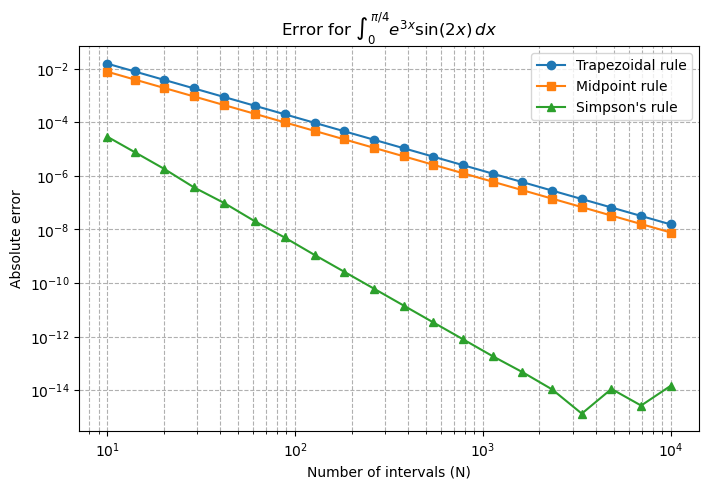

In [9]:
# Code here.
import matplotlib.pyplot as plt

# Define the function and its exact integral
def integrand(x):
    return np.exp(3 * x) * np.sin(2 * x)

def exact_integral():
    return (3 / 13) * np.exp(3 * (np.pi / 4)) + (2 / 13)

a = 0
b = np.pi / 4
exact = exact_integral()

N_values = np.logspace(1, 4, 20, dtype=int)  # N from 10 to 10000
trap_err = []
mid_err = []
simp_err = []

for N in N_values:
    # Trapezoidal
    trap = trapsum(integrand, a, b, N)
    trap_err.append(abs(trap - exact))
    # Midpoint
    mid = midsum(integrand, a, b, N)
    mid_err.append(abs(mid - exact))
    # Simpson's rule (N must be even)
    N_simpson = N if N % 2 == 0 else N + 1
    simp = simpsum(integrand, a, b, N_simpson)
    simp_err.append(abs(simp - exact))

plt.figure(figsize=(8,5))
plt.loglog(N_values, trap_err, 'o-', label='Trapezoidal rule')
plt.loglog(N_values, mid_err, 's-', label='Midpoint rule')
plt.loglog(N_values, simp_err, '^-', label="Simpson's rule")
plt.xlabel('Number of intervals (N)')
plt.ylabel('Absolute error')
plt.title(r'Error for $\int_0^{\pi/4} e^{3x}\sin(2x)\,dx$')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## Scipy and numpy

See NumPy: https://numpy.org

See SciPy: https://scipy.org

Scipy.integrate: https://docs.scipy.org/doc/scipy/tutorial/integrate.html


The `scipy.integrate.trapezoid` function provides a convenient way to numerically estimate the definite integral of a function using the trapezoidal rule. This method works by approximating the area under a curve as a series of trapezoids, making it especially useful when you have discrete data points for both the function values and their corresponding x-values. The function can handle both uniformly and non-uniformly spaced data, and is widely used for integrating experimental or tabulated data in scientific computing.


In [43]:
import numpy as np
import scipy as sp

#help(sp.integrate) # Uncomment this to see more about the integration functions


In [47]:


a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = sp.integrate.trapezoid(f, x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


In [48]:
#help(sp.integrate.trapezoid) #Uncomment this to see more about the trapezoid function

### Introduction to `scipy.integrate.quad`

The `scipy.integrate.quad` function is a powerful and widely used tool in Python for performing numerical integration (also known as quadrature) of functions. It is part of the `scipy.integrate` module and is based on adaptive algorithms that provide high-accuracy approximations of definite integrals.

**Key features:**
- Computes the definite integral of a function over a given interval \([a, b]\).
- Handles both finite and infinite integration limits.
- Returns both the estimated value of the integral and an estimate of the absolute error.
- Supports integration of functions with additional arguments.



`scipy.integrate.quad` is especially useful when the integrand does not have a simple analytical antiderivative or when high precision is required. It is the standard reference for "exact" numerical integration in scientific Python workflows.

**Basic usage example:**

In [49]:
from scipy.integrate import quad

# Define the function to integrate
def f(x):
    return x**2

# Integrate f(x) from 0 to 1
result, error = quad(f, 0, 1)
print("Integral:", result)
print("Estimated error:", error)

Integral: 0.3333333333333333
Estimated error: 3.700743415417188e-15


In [50]:
# help(sc.integrate.quad) # Uncomment to see more on quad.

### Exercise 6.22 
from https://gustavdelius.github.io/NumericalAnalysis2025/nmIntegrals.html.

Consider the integrals
$$
\int_{-2}^{2}e^{-x^2/2}dx 
$$
and 
$$
\int_0^1 cos(x^2)dx
$$
Neither of these integrals have closed-form solutions so a numerical method is necessary. Create a log-log plot that shows the errors for the integrals with different values of $h$ (log of $h$ on the -axis and log of the absolute error on the y-axis). Write a complete interpretation of the log-log plot. To get the exact answer for these plots use Python’s _scipy.integrate.quad_ command. (What we are really doing here is comparing our algorithms to Python’s _scipy.integrate.quad()_ algorithm).

_Extra_: Can you find how many intervals scipy.integrate.quad used? 

Hint: use the command _help(scipy.integrate.quad)_

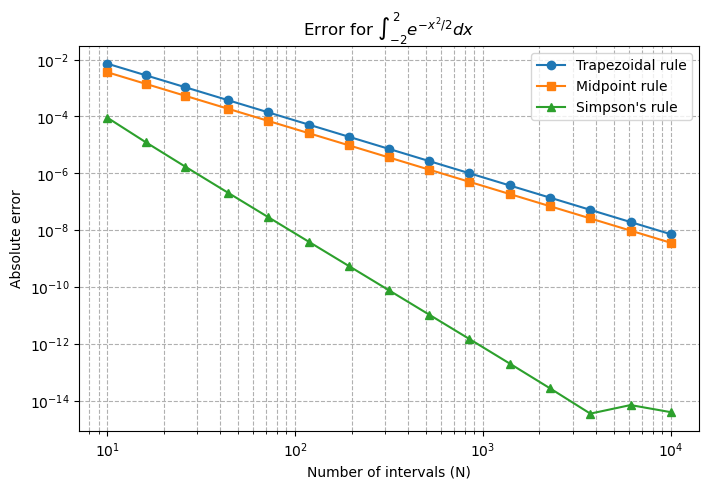

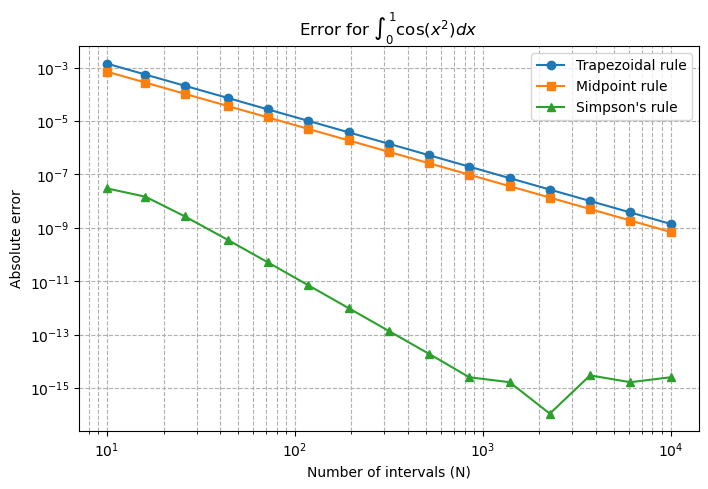

In [ ]:
from scipy.integrate import quad

# Define the integrands
def f1(x):
    return np.exp(-x**2 / 2)

def f2(x):
    return np.cos(x**2)

# Exact values using scipy's quad
exact1, _ = quad(f1, -2, 2)
exact2, _ = quad(f2, 0, 1)

# Prepare arrays to store errors
trap_err1, mid_err1, simp_err1 = [], [], []
trap_err2, mid_err2, simp_err2 = [], [], []

for N in N_values:
    # f1: exp(-x^2/2) on [-2,2]
    trap1 = trapsum(f1, -2, 2, N)
    mid1 = midsum(f1, -2, 2, N)
    N_simpson = N + 1 if N % 2 == 1 else N
    simp1 = simpsum(f1, -2, 2, N_simpson)
    trap_err1.append(abs(trap1 - exact1))
    mid_err1.append(abs(mid1 - exact1))
    simp_err1.append(abs(simp1 - exact1))
    # f2: cos(x^2) on [0,1]
    trap2 = trapsum(f2, 0, 1, N)
    mid2 = midsum(f2, 0, 1, N)
    N_simpson2 = N + 1 if N % 2 == 1 else N
    simp2 = simpsum(f2, 0, 1, N_simpson2)
    trap_err2.append(abs(trap2 - exact2))
    mid_err2.append(abs(mid2 - exact2))
    simp_err2.append(abs(simp2 - exact2))

# Plot for the first integral
plt.figure(figsize=(8,5))
plt.loglog(
    
    , trap_err1, 'o-', label='Trapezoidal rule')
plt.loglog(N_values, mid_err1, 's-', label='Midpoint rule')
plt.loglog(N_values, simp_err1, '^-', label="Simpson's rule")
plt.xlabel('Number of intervals (N)')
plt.ylabel('Absolute error')
plt.title(r'Error for $\int_{-2}^2 e^{-x^2/2} dx$')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plot for the second integral
plt.figure(figsize=(8,5))
plt.loglog(N_values, trap_err2, 'o-', label='Trapezoidal rule')
plt.loglog(N_values, mid_err2, 's-', label='Midpoint rule')
plt.loglog(N_values, simp_err2, '^-', label="Simpson's rule")
plt.xlabel('Number of intervals (N)')
plt.ylabel('Absolute error')
plt.title(r'Error for $\int_0^1 \cos(x^2) dx$')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()